In [235]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [173]:
data=pd.read_csv("http://goo.gl/IQl8nc")

In [174]:
data

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
0,2,4,8,8,2,9,7,4,6,a
1,1,1,4,7,1,1,1,2,2,a
2,2,3,5,9,2,9,5,1,6,a
3,1,6,10,8,3,4,5,2,1,a
4,1,1,5,8,1,9,9,1,1,a
5,2,8,9,5,3,8,7,1,2,a
6,1,1,5,7,1,5,1,1,1,a
7,2,1,7,5,2,8,7,7,1,a
8,2,1,8,10,1,7,7,5,1,a
9,3,1,9,8,1,3,3,4,1,a


In [214]:
data = data.reindex(np.random.permutation(data.index))
sampled_data=data.sample(frac=0.75)

In [215]:
float(len(sampled_data))/len(data)

0.75

In [216]:
sampled_data.isnull().any() #no missing values

perform    False
leader     False
latest     False
fun        False
serious    False
bargain    False
value      False
trendy     False
rebuy      False
brand      False
dtype: bool

In [217]:
dupicate=[a for a in range(len(sampled_data.duplicated())) if list(sampled_data.duplicated())[a]==True]

In [218]:
dupicate #there is no duplicate record

[]

In [219]:
sampled_data=sampled_data.drop_duplicates() #droping duplicates

In [220]:
XX=sampled_data.ix[:,'perform':'rebuy']

In [221]:
for i in XX.columns:
    if abs(stats.skew(XX[i]))>0.5:
        print 'column', i ,'is skewed and skewness is ',stats.skew(XX[i])

column serious is skewed and skewness is  0.59512938189
column rebuy is skewed and skewness is  0.704354905149


In [222]:
for i in XX.columns:
    try:
        print 'skewness of column ',i,' is ',stats.skew(XX[i])
        if abs(stats.skew(XX[i]))>0.5:
            XX[i]=list(stats.boxcox(XX[i])[0])
            print '    transfored skewness is ',stats.skew(XX[i])
    except:
        print 'skipped '+str(i)+' column' #performing Boxcox transformation to remove skewness in the data

skewness of column  perform  is  0.442135989261
skewness of column  leader  is  0.284659625646
skewness of column  latest  is  -0.299762275966
skewness of column  fun  is  -0.218012144048
skewness of column  serious  is  0.59512938189
    transfored skewness is  -0.0810555439904
skewness of column  bargain  is  0.342039083754
skewness of column  value  is  0.291164071721
skewness of column  trendy  is  0.0376005600799
skewness of column  rebuy  is  0.704354905149
    transfored skewness is  -0.0452454038792


In [223]:
outliers=np.argmax((np.abs(stats.zscore(XX))>3).all(axis=1))

In [224]:
outliers #there is no outlier

0

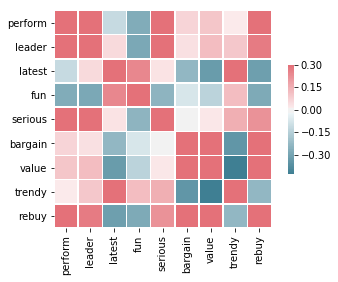

In [225]:
Corr_data=XX.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(Corr_data, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [226]:
pca=PCA(n_components=9) #there are many correlation between the columns . So performing PCA

In [227]:
pca.fit(X=XX)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [228]:
pca.explained_variance_ratio_

array([0.33504289, 0.24796562, 0.14765344, 0.1044459 , 0.06673106,
       0.05015798, 0.02754102, 0.01231058, 0.00815151])

In [229]:
pd.DataFrame(data=pca.components_,index=XX.columns)

,0,1,2,3,4,5,6,7,8
perform,0.283046,0.139048,-0.540633,-0.290454,0.029642,0.389965,0.398177,-0.446287,0.115039
leader,0.674350,0.504525,0.221740,-0.300375,0.146927,-0.145243,-0.108253,0.308592,0.041015
latest,-0.000110,0.131995,0.497743,0.331806,0.017130,0.615807,0.456092,0.183561,0.059220
fun,0.499861,-0.042257,-0.217601,0.805265,-0.028539,-0.122701,-0.102426,-0.161096,-0.015422
serious,-0.428815,0.795875,-0.034611,0.220643,0.140885,-0.191570,0.012739,-0.275591,-0.012616
bargain,-0.167317,0.120443,-0.597629,0.126888,0.090843,0.123472,0.047060,0.744749,0.062237
value,0.028538,-0.101524,0.027777,0.009039,-0.046954,-0.609290,0.777205,0.102099,-0.010638
trendy,-0.025776,-0.220591,0.040858,0.034798,0.953894,-0.035875,0.011304,-0.069251,0.177964
rebuy,-0.043821,-0.004561,0.051471,0.028068,-0.190281,-0.089948,-0.068356,-0.011404,0.972380


In [230]:
j=1
k=0
for i in pca.explained_variance_ratio_:
    k=k+i
    print 'principle component ',j,' explaines ',k
    j+=1

principle component  1  explaines  0.33504288773834656
principle component  2  explaines  0.5830085045882121
principle component  3  explaines  0.7306619484963685
principle component  4  explaines  0.8351078510582803
principle component  5  explaines  0.9018389132658092
principle component  6  explaines  0.9519968945198107
principle component  7  explaines  0.9795379095883157
principle component  8  explaines  0.9918484943920884
principle component  9  explaines  0.9999999999999999


In [246]:
PCA_XX=pca.transform(XX)

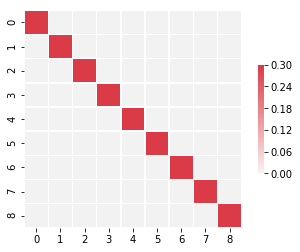

In [299]:
Corr_data=pd.DataFrame(data=PCA_XX).corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(Corr_data, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

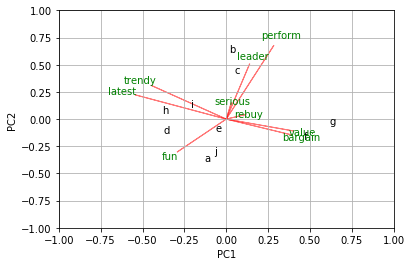

In [300]:
dict_of_brandvalues={}
for p in range(len(sampled_data['brand'])):
    for i in list(set(sampled_data['brand'])):
        if i not in dict_of_brandvalues.keys():
            dict_of_brandvalues[i]=[]
        if sampled_data.iloc[p]['brand']==i:
            dict_of_brandvalues[i].append(p)
dict_of_coordinate={}
for i in dict_of_brandvalues.keys():
    dict_of_coordinate[i]=[]
    for j in range(2):
        dict_of_coordinate[i].append(np.mean(PCA_XX[dict_of_brandvalues[i],j:j+1]))
brandvalue=pd.DataFrame(data=dict_of_coordinate).transpose()
def myplot(score,coeff,brandpoints,labels=None):
    xs = np.asarray(brandpoints)[:,0]
    ys = np.asarray(brandpoints)[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    #plt.scatter(xs * scalex,ys * scaley)
    for word, x,y in zip(brandpoints.index, xs * scalex, ys * scaley):
        try:
            plt.annotate(word,xy=(x,y))
        except:
            kk=0
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
le=LabelEncoder()
YYY=le.fit_transform(sampled_data['brand'])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
myplot(PCA_XX[:,0:2],np.transpose(pca.components_[0:2,:]),brandvalue,XX.columns)
plt.show()